In [3]:
import os
from pathlib import Path
from aocd.models import Puzzle
import collections
import numpy as np
import re
from statistics import median, mean
import math
import queue
import itertools
import more_itertools
infinite_defaultdict = lambda: collections.defaultdict(infinite_defaultdict)
from copy import copy
import functools
import heapq
import operator
from tqdm.notebook import trange, tqdm
import networkx as nx
import pprint
import bisect
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt
import shapely
from scipy.optimize import linprog
import numpy as np
from polyomino.board import Rectangle
from polyomino.constant import MONOMINO
from polyomino.tileset import Tileset
from polyomino.error import CoverWithWrongSize

In [4]:
os.environ['AOC_SESSION'] = '53616c7465645f5f08d795ada87fdaa821937db93593e55408b837c7c3a8488c30508f44853548c94060e564038da7c3f983c9db6d52d939c0b3972f80db50c7'

In [5]:
year = 2025

# Day 1

In [ ]:
puzzle = Puzzle(year, 1)

In [ ]:
puzzle.input_data

In [ ]:
test = """L68
L30
R48
L5
R60
L55
L1
L99
R14
L82"""

## Part 1 

In [ ]:
def d1_parta(data, dial = 50):
    match = 0
    for line in data.split("\n"):
        command, value = line[0], int(line[1:])
    
        match command:
            case "L":
                dial -= value
            case "R":
                dial += value
    
        dial %= 100
        match += dial == 0
            
    return match
            
    

In [ ]:
d1_parta(test)

In [ ]:
res_a = d1_parta(puzzle.input_data)
res_a

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
def d1_partb(data, dial = 50):
    match = 0
    for line in data.split("\n"):
        command, value = line[0], int(line[1:])
        match += value // 100
    
        match command:
            case "L":
                new_dial = (dial - value) % 100
                if dial != 0 and (new_dial > dial or new_dial == 0):
                    match += 1
            case "R":
                new_dial = (dial + value) % 100
                if new_dial < dial : 
                     match += 1
                    
        dial = new_dial
            
    return match
            
    

In [ ]:
test2 = """R1050"""
d1_partb(test2)

In [ ]:
d1_partb(test)

In [ ]:
res_b = d1_partb(puzzle.input_data)
res_b

In [ ]:
puzzle.answer_b = res_b

# Day 2

In [ ]:
puzzle = Puzzle(year, 2)

In [ ]:
data_test = """11-22,95-115,998-1012,1188511880-1188511890,222220-222224,1698522-1698528,446443-446449,38593856-38593862,565653-565659,824824821-824824827,2121212118-2121212124"""

In [ ]:
def invalid_id(value):
    value = str(value)
    length = len(value) // 2
    return value[:length] == value[length:]

def next_value(value):
    value = str(value)
    length = len(value)
    if length % 2 == 1:
        half_value = "1" + length // 2 * "0" 
    else:
        first_half = int(value[:length//2])
        second_half = int(value[length//2:])
        
        half_value = first_half
        if first_half <= second_half : 
            half_value += 1
            
        half_value = str(half_value)
        
    return int(half_value * 2)

def day2_parta(data):
    res = 0
    for r in data.split(","):
        x, y = map(int, r.split("-"))
        while x <= y:
            if invalid_id(x):
                res += x
                
            x = next_value(x)
    
    return res
        

In [ ]:
day2_parta(data_test) == 1227775554

## Part 1 

In [ ]:
res_a = day2_parta(puzzle.input_data)

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
def invalid_id(value):
    value = str(value)
    new_value = value
    for _ in range(len(value) // 2):
        new_value = new_value[1:] + new_value[0]
        if value == new_value:
            return True
        
    return False

def day2_partb(data):
    res = 0
    for r in data.split(","):
        x, y = map(int, r.split("-"))
        while x <= y:
            if invalid_id(x):
                res += x
            x += 1         
    
    return res
        

In [ ]:
day2_partb(data_test)

In [ ]:
res_b = day2_partb(puzzle.input_data)
res_b

In [ ]:
puzzle.answer_b = res_b

# Day 3

In [ ]:
puzzle = Puzzle(year, 3)

In [ ]:
data_test = """987654321111111
811111111111119
234234234234278
818181911112111"""

## Part 1 

In [42]:
def day3_part1(data):
    res = 0

    for line in data.splitlines():
        
        x1, x10 = line[-1], line[-2]
        potential_max_x1 = x1

        for x in reversed(line[:-2]):
            if x >= x10:
                x10, x = x, x10
                x1 = max(potential_max_x1, x1, x)
                potential_max_x1 = x1
            elif potential_max_x1 <= x:
                potential_max_x1 = x
            
        res += int(x10 + x1)

    return res
        

In [43]:
day3_part1(data_test)

357

In [ ]:
res_a = day3_part1(puzzle.input_data)
res_a

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
list(reversed(range(15)))

In [ ]:
list(range(15))[:15-12]

In [64]:
def find_max(value, nb_to_find=12):
    for j in reversed(range(nb_to_find)):
        max_char = max(value[:len(value) - j])
        value = value[value.index(max_char) + 1:]
        
        yield max_char

def day3_part2(data):
    return sum(int("".join(find_max(line))) for line in data.splitlines())

In [65]:
day3_part2(data_test) == 3121910778619

True

In [66]:
res_b = day3_part2(puzzle.input_data)
res_b

171846613143331

In [60]:
puzzle.answer_b = res_b

# Day 4

In [53]:
puzzle = Puzzle(year, 4)

In [84]:
data_test = """..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@."""

In [85]:
def create_grid_with_diagonals(data):
    array = np.array(list(map(list, data.splitlines())))
    rows, cols = array.shape
    graph = nx.grid_2d_graph(rows, cols)
    
    # Add diagonal edges
    for i in range(rows - 1):
        for j in range(cols - 1):
            graph.add_edge((i, j), (i + 1, j + 1))  # down-right
            graph.add_edge((i + 1, j), (i, j + 1))  # down-left

    for node, value in np.ndenumerate(array):
        graph.nodes[node]["value"] = value
        
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == "." or graph.nodes[n2]["value"] == ".":
            graph.remove_edge(n1, n2)
    
    return graph

In [86]:
def plot_graph(graph):
    pos = {(i, j): (j, -i) for i, j in graph.nodes()}
    labels = nx.get_node_attributes(graph, 'value')
    nx.draw(graph, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
    plt.show()

## Part 1 

In [87]:
def day4_part1(data, plot=False):
    graph = create_grid_with_diagonals(data)
    if plot:
        plot_graph(graph)
    return sum(len(graph.edges(node)) < 4 and data["value"] == "@" for node, data in graph.nodes(data=True))

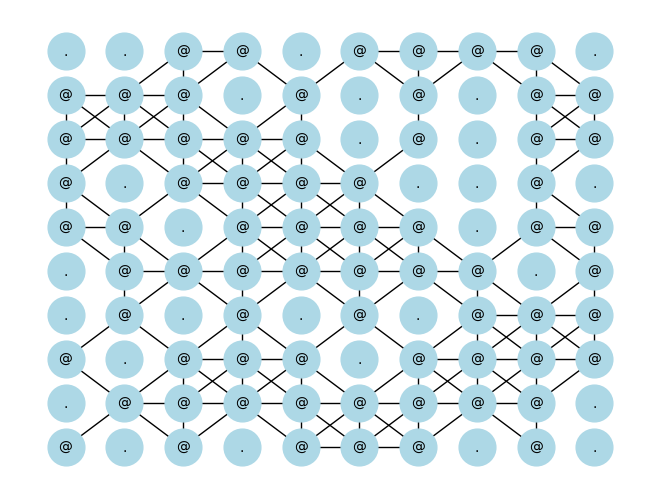

13

In [90]:
day4_part1(data_test, True)

In [91]:
answer_a= day4_part1(puzzle.input_data)

In [92]:
puzzle.answer_a = answer_a

## Part 2

In [93]:
def day4_part2(data, plot=False):
    graph = create_grid_with_diagonals(data)
    res = 0
    while True:
        if plot:
            plot_graph(graph)
    
        nodes_to_remove = set(node for node, data in graph.nodes(data=True) if len(graph.edges(node)) < 4 and data["value"] == "@")
        

        for node in nodes_to_remove:
            graph.remove_edges_from(set(graph.edges(node)))
            graph.nodes[node]["value"] = "x"
        
        if len(nodes_to_remove) == 0:
            return res

        res += len(nodes_to_remove)    
    
   

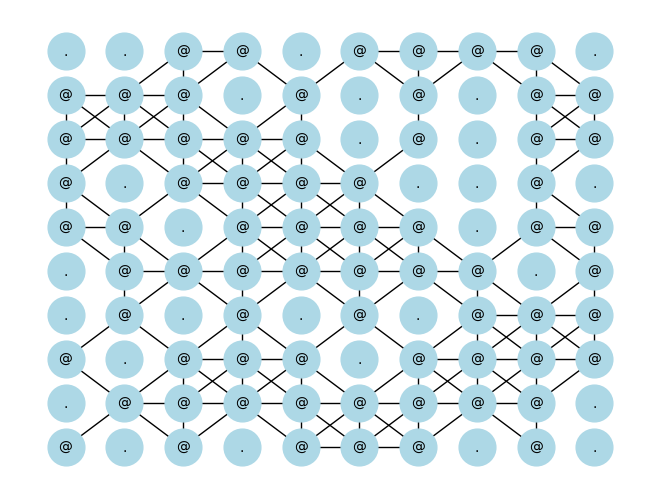

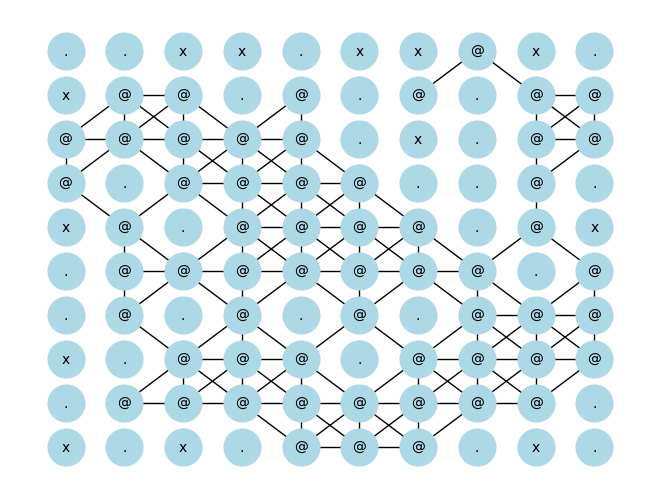

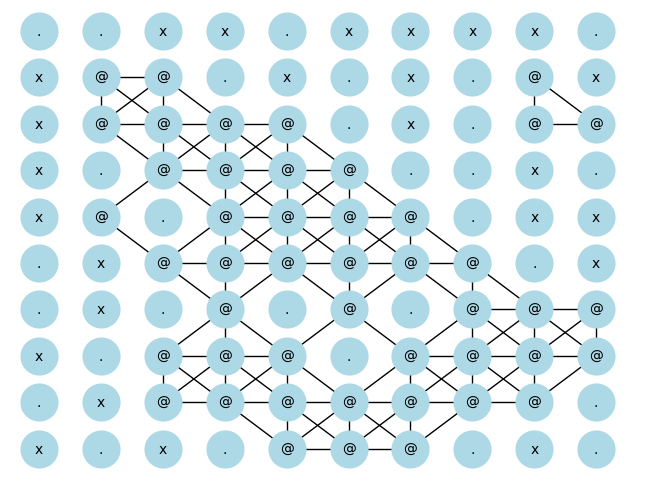

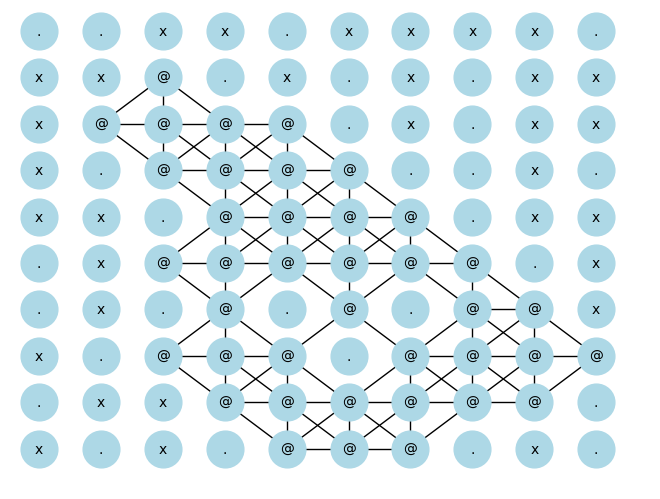

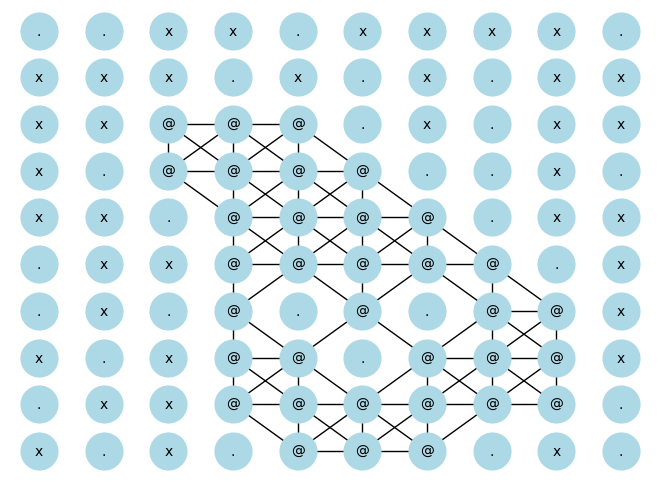

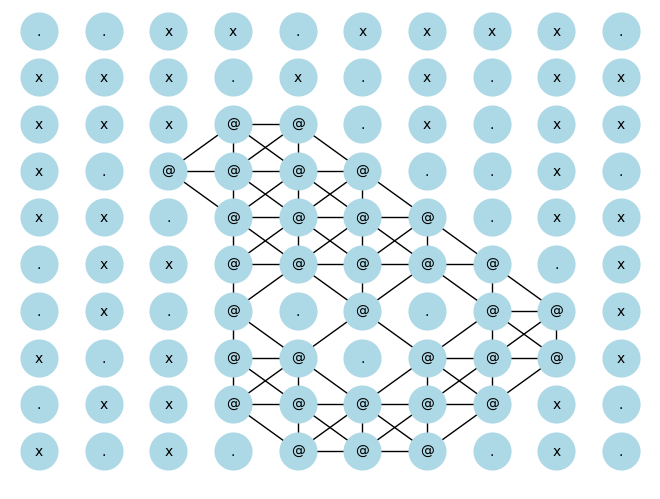

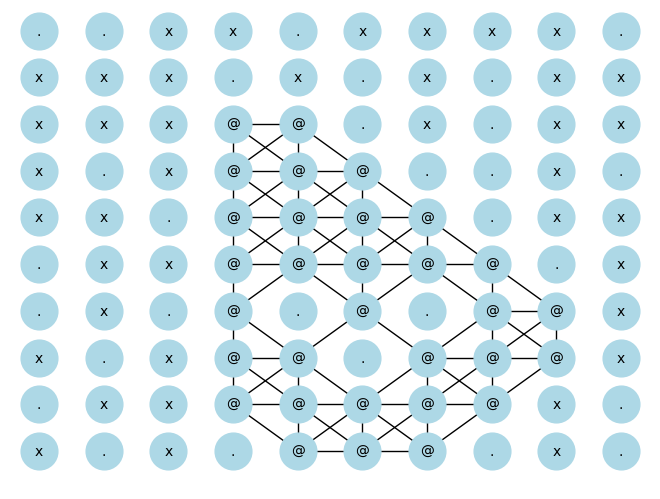

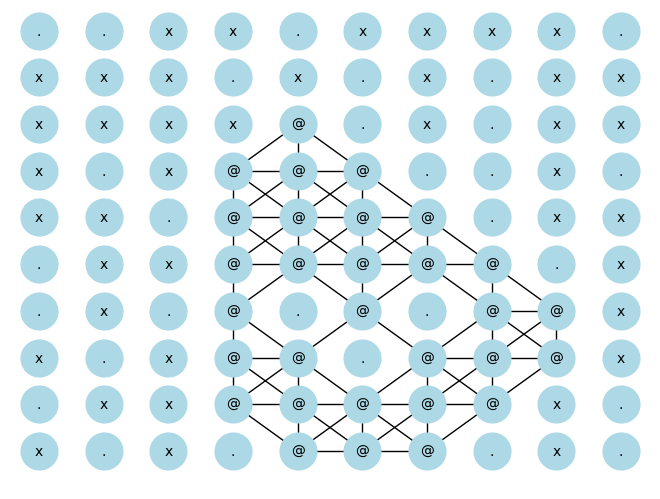

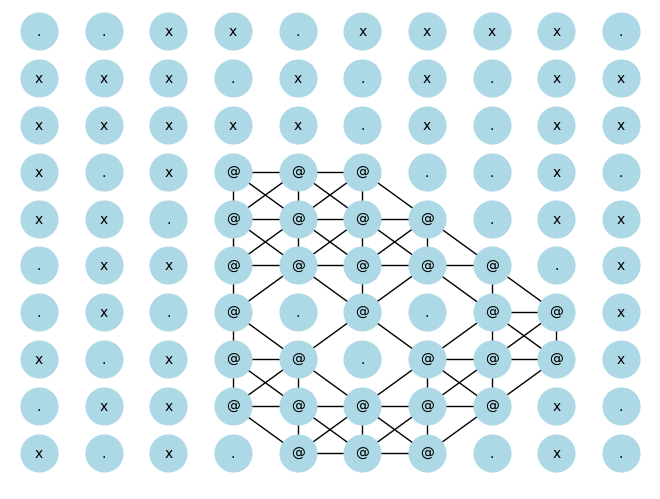

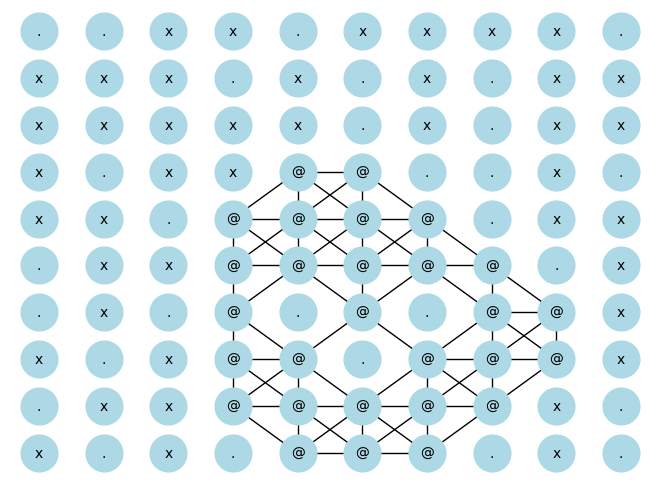

43

In [94]:
day4_part2(data_test, True)

In [81]:
answer_b = day4_part2(puzzle.input_data)

In [82]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 4! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 5

In [5]:
puzzle = Puzzle(year, 5)

In [60]:
data_test = """3-5
10-14
16-20
12-18

1
5
8
11
17
32"""

In [ ]:
def parse_data(data):
    ranges, values = data.split("\n\n")
    ranges = set(tuple(map(int, line.split("-"))) for line in ranges.splitlines())
    values = list(map(int, values.splitlines()))

    return ranges, values
    

## Part 1 

In [18]:
def day5_part1(data):
    ranges, values = parse_data(data)
    return sum(any(a <= value <= b for a, b in ranges) for value in values)

In [19]:
parse_data(data_test)

({(3, 5), (10, 14), (12, 18), (16, 20)}, [1, 5, 8, 11, 17, 32])

In [20]:
day5_part1(data_test)

3

In [21]:
answer_a = day5_part1(puzzle.input_data)
puzzle.answer_a = answer_a

That's the right answer!  You are one gold star closer to decorating the North Pole. [Continue to Part Two]


## Part 2

In [65]:
def day5_part2(data):
    ranges, _ = parse_data(data)
    ranges = sorted(list(ranges))
    a, b = ranges[0]
    
    total_ids = 0
    for a1, b1 in ranges[1:]:
        if a1 <= b:
            b = max(b, b1)
            continue

        total_ids += b - a + 1
        a, b = a1, b1
        
    total_ids += b - a + 1
        
    return total_ids

In [66]:
day5_part2(data_test)

14

In [67]:
answer_b = day5_part2(puzzle.input_data)
answer_b

354143734113772

In [64]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 5! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 6

In [8]:
puzzle = Puzzle(year, 6)

In [28]:
data_test  = 
"""
123 328  51 64 
 45 64  387 23 
  6 98  215 314
*   +   *   +  """

## Part 1 

In [51]:
def day6_part1(data):
    func_mapping = {"+": sum, "*": math.prod}

    res = 0
    for *values, op in zip(*map(lambda line : re.split(" +", line.strip()), data.splitlines())):
        res += func_mapping[op](map(int, values))
    
    return res

In [52]:
day6_part1(data_test)

4277556

In [53]:
answer_a = day6_part1(puzzle.input_data)

In [54]:
puzzle.answer_a = answer_a

That's the right answer!  You are one gold star closer to decorating the North Pole. [Continue to Part Two]


## Part 2

In [79]:
def day6_part2(data):
    func_mapping = {"+": sum, "*": math.prod}

    res = 0
    last_op = ""
    numbers = []
    for *values, op in zip(*data.splitlines()):
        if op != " ":
            last_op = op     
        
        if all(elem == " " for elem in values):
            res += func_mapping[last_op](numbers)
            numbers = []
        else:
            numbers.append(int("".join(values)))

    res += func_mapping[last_op](numbers)
     
    return res

In [81]:
day6_part2(data_test)

3263827

In [82]:
answer_b = day6_part2(puzzle.input_data)

In [83]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 6! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 7

In [126]:
puzzle = Puzzle(year, 7) 

In [136]:
def print_flow(arr):
    for line in arr:
        print("".join(map(str, line)))

## Part 1 

In [137]:
def day7_part1(data, pp=False):
    flows = list(map(list, data.splitlines()))
    
    start = flows[0].index("S")
    flows[1][start] = "|"

    max_x, max_y = len(flows), len(flows[0])
    
    res = 0
    for x in range(1, max_x - 1):
        if pp:
            print(x)
            print_flow(flows)
            print()
        
        for y, val in enumerate(flows[x]):
            if val != "|":
                continue
    
            match flows[x + 1][y]:
                case ".":
                    flows[x + 1][y] = "|"
                case "^":
                    res += 1
                    
                    if y - 1 >= 0:
                        flows[x+1][y-1] = "|"
                    if y + 1 < max_y:
                        flows[x+1][y+1] = "|"
    if pp:
        print_flow(flows)
    
    return res

In [138]:
day7_part1(data_test, True) == 21

1
.......S.......
.......|.......
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............

2
.......S.......
.......|.......
......|^|......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............

3
.......S.......
.......|.......
......|^|......
......|.|......
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............

4
.......S.......
.......|.......
......|^|......
......|.|......
.....|^|^|.....
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
.............

True

In [130]:
answer_a = day7_part1(puzzle.input_data)
answer_a

1590

In [125]:
puzzle.answer_a = answer_a

That's the right answer!  You are one gold star closer to decorating the North Pole. [Continue to Part Two]


## Part 2

In [158]:
def day7_part2(data):
    flows = [[val if val != "." else 0 for val in line] for line in data.splitlines()]
    
    start = flows[0].index("S")
    flows[1][start] = 1

    max_x, max_y = len(flows), len(flows[0])
    
    for x in range(1, max_x - 1):
        for y, val in enumerate(flows[x]):
            if not isinstance(val, int) or val == 0:
                continue
    
            match flows[x + 1][y]:
                case int():
                    flows[x + 1][y] += val
                case "^":                    
                    if y - 1 >= 0:
                        flows[x+1][y-1] += val
                    if y + 1 < max_y:
                        flows[x+1][y+1] += val
    return sum(flows[-1])

In [160]:
day7_part2(data_test)

40

In [162]:
answer_b = day7_part2(puzzle.input_data)
answer_b

20571740188555

In [155]:
puzzle.answer_b = answer_b

# Day 8

In [7]:
puzzle = Puzzle(year, 8)

In [6]:
data_test = """162,817,812
57,618,57
906,360,560
592,479,940
352,342,300
466,668,158
542,29,236
431,825,988
739,650,466
52,470,668
216,146,977
819,987,18
117,168,530
805,96,715
346,949,466
970,615,88
941,993,340
862,61,35
984,92,344
425,690,689"""

In [302]:
class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    @property
    def to_tuple(self):
        return (self.x, self.y, self.z)
        
    def distance(self, point):
        return math.dist(self.to_tuple, point.to_tuple)

    def __repr__(self):
        return f"Point({self.x=}/{self.y=}/{self.z=})"
    
    def __str__(self):
        return f"Point({self.x=}/{self.y=}/{self.z=})"

## Part 1 

In [315]:
def day8_part1(data, iteration):
    points = set(Point(*map(int, line.split(","))) for line in data.splitlines())

    distances = {}
    for p1, p2 in itertools.combinations(points, 2):
        distances[(p1, p2)] = p1.distance(p2)
    
    circuits = {p: {p} for p in points}
    
    for idx, ((p1, p2), distance) in enumerate(sorted(distances.items(), key=operator.itemgetter(1))):
        if idx >= iteration:
            break

        if p1 in circuits[p2] and p2 in circuits[p1]:
            continue

        circuits[p1].add(p2)
        circuits[p2].add(p1)

        all_p = circuits[p1] | circuits[p2]
        for p in all_p:
            circuits[p].update(all_p)
            
    return math.prod(len(c) for c in sorted(set(map(frozenset, circuits.values())), key=len, reverse=True)[:3])

In [316]:
day8_part1(data_test, 10)

40

In [317]:
answer_a = day8_part1(puzzle.input_data, 1000)
answer_a

153328

In [318]:
puzzle.answer_a = answer_a

## Part 2

In [323]:
def day8_part2(data):
    points = set(Point(*map(int, line.split(","))) for line in data.splitlines())

    distances = {}
    for p1, p2 in itertools.combinations(points, 2):
        distances[(p1, p2)] = p1.distance(p2)
    
    circuits = {p: {p} for p in points}
    
    for (p1, p2), distance in sorted(distances.items(), key=operator.itemgetter(1)):
        if p1 in circuits[p2] and p2 in circuits[p1]:
            continue

        circuits[p1].add(p2)
        circuits[p2].add(p1)

        all_p = circuits[p1] | circuits[p2]
        for p in all_p:
            circuits[p].update(all_p)
            
        if all_p == points:
            return p1.x * p2.x

In [324]:
day8_part2(data_test)

25272

In [325]:
answer_b = day8_part2(puzzle.input_data)
answer_b

6095621910

In [322]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 8! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 9

In [6]:
puzzle = Puzzle(year, 9)

In [130]:
data_test = """6,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
7,2
6,2"""

## Part 1 

In [8]:
def area(p1, p2):
    x = abs(p1[0] - p2[0]) + 1
    y = abs(p1[1] - p2[1]) + 1
    return x * y

def day9_part1(data):
    coords = [tuple(map(int, line.split(","))) for line in data.splitlines()]
    max_coord = max(itertools.combinations(coords, 2), key=lambda values: area(*values))
    return area(*max_coord)
    

In [9]:
day9_part1(data_test)

50

In [10]:
answer_a = day9_part1(puzzle.input_data)
answer_a

4771532800

In [11]:
puzzle.answer_a = answer_a

## Part 2

In [148]:
def check_no_inside(d1, d2, polygon):
    min_x = min(d1[0], d2[0])
    min_y = min(d1[1], d2[1])
    max_x = max(d1[0], d2[0])
    max_y = max(d1[1], d2[1])
    curr_poly = Polygon(((min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y)))

    return polygon.contains(curr_poly)

In [149]:
def day9_part2(data):
    
    coords = [tuple(map(int, line.split(","))) for line in data.splitlines()]
    polygon = shapely.Polygon(Point(*coord) for coord in coords)

    max_coord = max([combination for combination in itertools.combinations(coords, 2) if check_no_inside(*combination, polygon)], key=lambda values: area(*values))
    return area(*max_coord)

In [150]:
day9_part2(data_test)

24

In [ ]:
answer_b = day9_part2(puzzle.input_data)
answer_b

In [147]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 9! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 10

In [70]:
puzzle = Puzzle(year, 10)

In [72]:
data_test = """[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}
[...#.] (0,2,3,4) (2,3) (0,4) (0,1,2) (1,2,3,4) {7,5,12,7,2}
[.###.#] (0,1,2,3,4) (0,3,4) (0,1,2,4,5) (1,2) {10,11,11,5,10,5}"""

In [7]:
class Button:
    def __init__(self, button, joltage):
        self.button = button
        self.joltage = joltage

class Machine:
    def __init__(self, text):
        light_indactors, *buttons, joltage = text.split(" ")
        self.light_indactors = frozenset(idx for idx, c in enumerate(light_indactors[1:-1]) if c == "#")
        self.buttons = [frozenset(map(int, button[1:-1].split(","))) for button in buttons]
        self.joltage = list(map(int, joltage[1:-1].split(",")))
        self.result = set()

    def part_a(self):
        self.iter(self.light_indactors, frozenset())
        return min(len(res) for res in self.result)

    @functools.cache
    def iter(self, base, seen):
        if not base:
            self.result.add(seen)
            return

        for button in self.buttons:
            if button not in seen and button.intersection(base):
                new_base = base ^ button
                new_seen = frozenset(seen | {button})
                self.iter(new_base, new_seen)
        

## Part 1 

In [8]:
def day10_part1(data):
    machines = [Machine(line) for line in data.splitlines()]
    return sum(machine.part_a() for machine in machines)

In [9]:
day10_part1(data_test)

7

In [10]:
answer_a = day10_part1(puzzle.input_data)
answer_a

532

In [57]:
puzzle.answer_a = answer_a

## Part 2

In [11]:
class Button:
    def __init__(self, button, joltage):
        self.button = button
        self.joltage = joltage

class Machine2:
    def __init__(self, text):
        light_indactors, *buttons, joltage = text.split(" ")
        self.light_indactors = frozenset(idx for idx, c in enumerate(light_indactors[1:-1]) if c == "#")
        self.joltage = tuple(map(int, joltage[1:-1].split(",")))
        buttons = [frozenset(map(int, button[1:-1].split(","))) for button in buttons]
        self.buttons = [tuple(1 if i in button else 0 for i in range(len(self.joltage))) for button in buttons]
        self.result = set()

    def part_b(self):
        mapping = {button: 0 for button in self.buttons}
        self.iter(self.joltage, frozenset(mapping.items()))
        return min(self.result)

    @functools.cache
    def iter(self, remaining_joltage, mapping):
        if all(value == 0 for value in remaining_joltage):
            self.result.add(sum(dict(mapping).values()))
            return

        for button in self.buttons:
            new_mapping = dict(mapping)
            new_mapping[button] += 1
            new_remaining_joltage = tuple(x - y for x, y in zip(remaining_joltage, button))
            if not any(value < 0 for value in new_remaining_joltage):
                self.iter(new_remaining_joltage, frozenset(new_mapping.items()))

Utilisation de l'algèbre linéaire ...
joltage_i = résult
eq donnée par button
button_i = (0*, i*, o, i)

In [123]:
class Button:
    def __init__(self, button, joltage):
        self.button = button
        self.joltage = joltage

class Machine2:
    def __init__(self, text):
        light_indactors, *buttons, joltage = text.split(" ")
        self.light_indactors = frozenset(idx for idx, c in enumerate(light_indactors[1:-1]) if c == "#")
        self.joltage = tuple(map(int, joltage[1:-1].split(",")))
        buttons = [frozenset(map(int, button[1:-1].split(","))) for button in buttons]
        self.buttons = [list(1 if i in button else 0 for i in range(len(self.joltage))) for button in buttons]
        self.result = 0
        
    def part_b(self):
        A = np.array(self.buttons).T
        b = np.array(self.joltage)
        c = np.ones(A.shape[1])
        self.result = round(linprog(c=c, A_eq=A, b_eq=b, integrality=True).fun)
        return self.result

In [124]:
def day10_part2(data):
    machines = [Machine2(line) for line in data.splitlines()]
    return sum(machine.part_b() for machine in machines)

In [125]:
day10_part2(data_test)

33

In [126]:
answer_b = day10_part2(puzzle.input_data)
answer_b

18387

In [119]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 10! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 11

In [4]:
puzzle = Puzzle(year, 11)

In [5]:
data_test = """aaa: you hhh
you: bbb ccc
bbb: ddd eee
ccc: ddd eee fff
ddd: ggg
eee: out
fff: out
ggg: out
hhh: ccc fff iii
iii: out"""

In [6]:
def plot_graph(graph):
    nx.draw(graph, with_labels=True, node_color='lightblue')
    plt.show()

In [7]:
def create_graph(data):
    graph = nx.DiGraph()
    
    for line in data.splitlines():
        node, connections = line.split(":")
        for connection in connections.strip().split(" "):
            graph.add_edge(node, connection)

    return graph
        

## Part 1 

In [8]:
def day11_part1(data):
    graph = create_graph(data)
    plot_graph(graph)
    return len(list(nx.all_simple_paths(graph, "you", "out")))

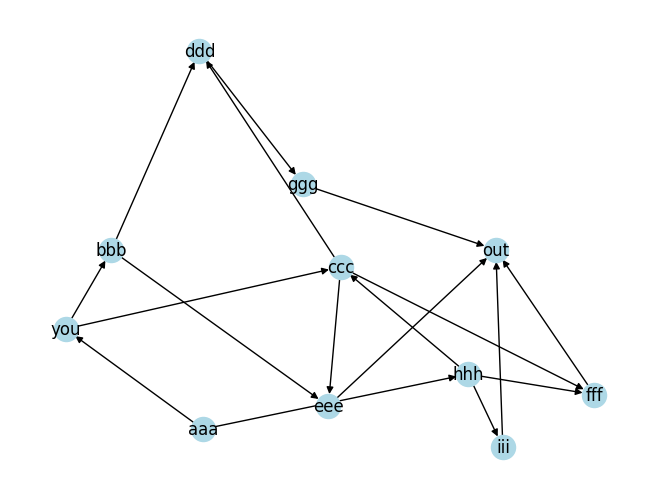

True

In [9]:
day11_part1(data_test) == 5

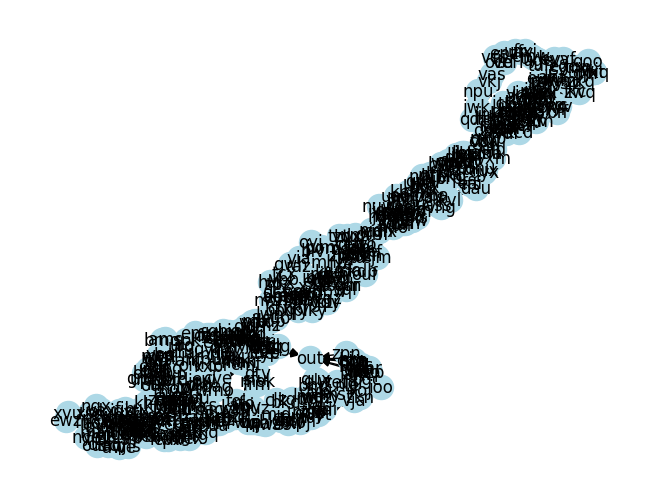

788

In [10]:
answer_a = day11_part1(puzzle.input_data)
answer_a

In [11]:
puzzle.answer_a = answer_a

## Part 2

In [12]:
data_test2 = """svr: aaa bbb
aaa: fft
fft: ccc
bbb: tty
tty: ccc
ccc: ddd eee
ddd: hub
hub: fff
eee: dac
dac: fff
fff: ggg hhh
ggg: out
hhh: out"""

In [25]:
def day11_part2_marche_pas(data):
    graph = create_graph(data)
    plot_graph(graph)

    res = 0
    if nx.has_path(graph, "svr", "fft") and nx.has_path(graph, "fft", "dac") and nx.has_path(graph, "dac", "out"):
        svr_to_fft = 0
        for _ in tqdm(nx.all_simple_paths(graph, "svr", "fft")):
            svr_to_fft += 1

        fft_to_dac = 0
        for _ in tqdm(nx.all_simple_paths(graph, "fft", "dac")):
            fft_to_dac += 1

        dac_to_out = 0
        for _ in tqdm(nx.all_simple_paths(graph, "dac", "out")):
            dac_to_out += 1

        res += svr_to_fft * fft_to_dac * dac_to_out
    else:
        print("missing a path between svr -> fft -> dac -> out")
    
    if nx.has_path(graph, "svr", "dac") and nx.has_path(graph, "dac", "fft") and nx.has_path(graph, "fft", "out"):
        svr_to_dac = 0
        for _ in tqdm(nx.all_simple_paths(graph, "svr", "dac")):
            svr_to_fft += 1

        dac_to_fft = 0
        for _ in tqdm(nx.all_simple_paths(graph, "dac", "fft")):
            fft_to_dac += 1

        dac_to_out = 0
        for _ in tqdm(nx.all_simple_paths(graph, "fft", "out")):
            dac_to_out += 1
        
        res += svr_to_dac * dac_to_fft * fft_to_out
    else:
        print("missing a path between svr -> dac -> fft -> out")
        
    return res

In [26]:
def count_paths_custom(graph, start, ends):
    counter = collections.defaultdict(int)
    counter[start] = 1
    
    for node in nx.topological_sort(graph):
        for next_node in graph.successors(node):
            counter[next_node] += counter[node]

    return [counter[end] for end in ends]
    
def day11_part2(data):
    graph = create_graph(data)
    plot_graph(graph)

    svr_to_fft, svr_to_dac = count_paths_custom(graph, "svr", ["fft", "dac"])
    fft_to_dac, fft_to_out = count_paths_custom(graph, "fft", ["dac", "out"])
    dac_to_fft, dac_to_out = count_paths_custom(graph, "dac", ["fft", "out"])
        
    return svr_to_fft * fft_to_dac * dac_to_out + svr_to_dac * dac_to_fft * fft_to_out


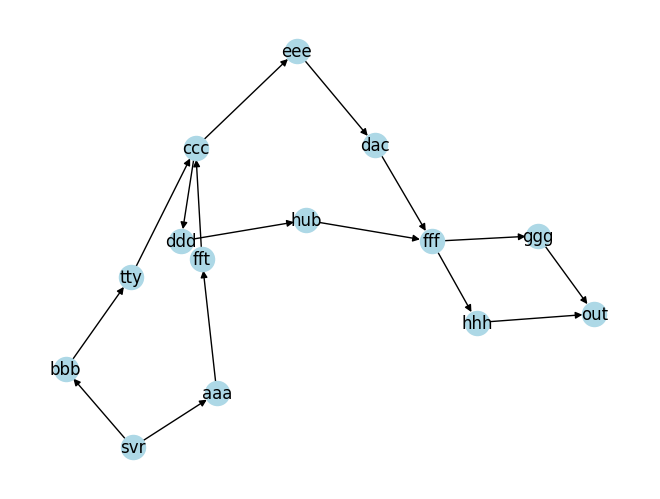

True

In [27]:
day11_part2(data_test2) == 2

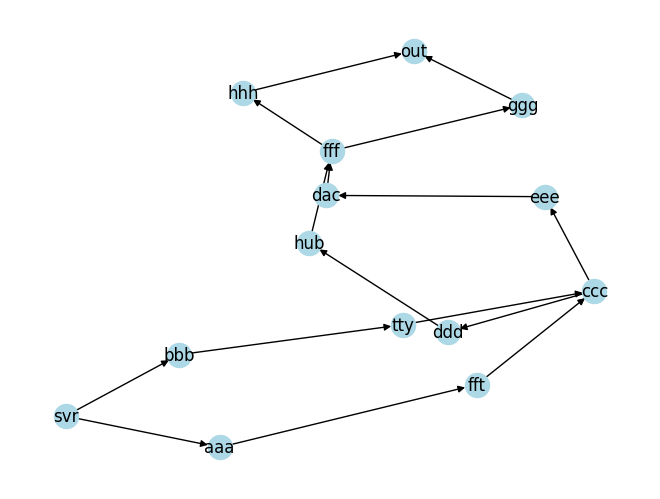

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

missing a path between svr -> dac -> fft -> out


2

In [28]:
day11_part2_marche_pas(data_test2)

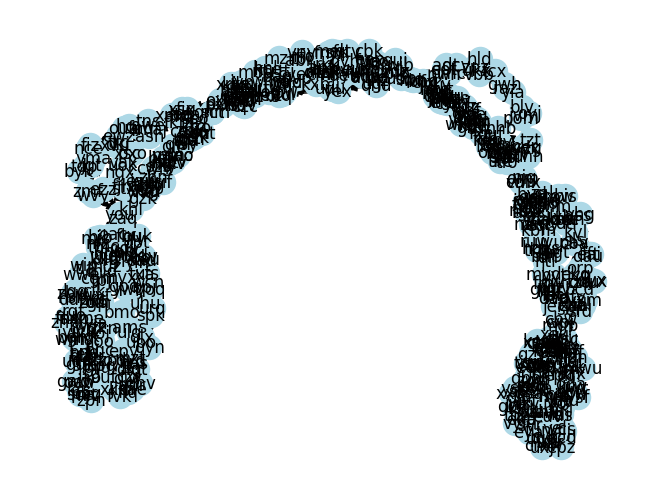

316291887968000

In [29]:
answer_b = day11_part2(puzzle.input_data)
answer_b

In [24]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 11! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 12

In [8]:
puzzle = Puzzle(year, 12)

In [9]:
data_test = """0:
###
##.
##.

1:
###
##.
.##

2:
.##
###
##.

3:
##.
###
##.

4:
###
#..
###

5:
###
.#.
###

4x4: 0 0 0 0 2 0
12x5: 1 0 1 0 2 2
12x5: 1 0 1 0 3 2"""

## Part 1 

In [33]:
def day12_part1(data, with_solving=False):
    *pieces_raw, boards_raw = data.split("\n\n")
    pieces = []
    for piece_raw in pieces_raw:
        new_piece = [(idy, idx) for idx, line in enumerate(piece_raw.splitlines()[1:]) for idy, char in enumerate(line) if char == "#"]
        pieces.append(new_piece)

    res = 0
    for board_raw in boards_raw.splitlines():
        board_size, nb_pieces = board_raw.split(":")
        x, y = map(int, board_size.split("x"))
        board = Rectangle(x, y)
        nb_pieces = list(map(int, nb_pieces.strip().split(" ")))
        all_pieces = list(itertools.chain.from_iterable(list(itertools.repeat(pieces[idx], nb_piece)) for idx, nb_piece in enumerate(nb_pieces) if nb_piece))
        tileset = Tileset(all_pieces, [], [MONOMINO])
        try:
            solution = board.tile_with_set(tileset).with_heuristics()
            if with_solving:
                solution = solution.solve()
                
            if solution:
                res += 1
                
        except CoverWithWrongSize:
            continue
        
    return res

In [34]:
day12_part1(data_test, True)

2

In [35]:
answer_a = day12_part1(puzzle.input_data)
answer_a

469

In [13]:
puzzle.answer_a = answer_a

That's the right answer!  You are one gold star closer to decorating the North Pole. [Continue to Part Two]


## Part 2